# 548 hw6 sol

# simulating random variables

***Purpose:*** *this problem will show you how to work with (Gaussian/normal) random variables in scientific computing by determining or estimating their mean and covariance.*

Let $w:\Omega\rightarrow\mathbb{R}^k$ be a random vector obtained by concatenating $k$ independent standard normal (scalar) random variables.

The *sample covariance* $\Sigma_N$ associated with a dataset $\left\{w_j\right\}_{j=1}^N\subset\mathbb{R}^k$ of outcomes from $w$ is defined by
$$\Sigma_N = \frac{1}{N-1}\sum_{j=1}^N(w_j - \bar{w}_N)(w_j - \bar{w}_N)^T$$
where $\bar{w}_N$ denotes the *sample mean*
$$\bar{w}_N = \frac{1}{N}\sum_{j=1}^Nw_j.$$

According to the [Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers),  the limits 
$\bar{w} = \lim_{N\rightarrow\infty}\bar{w}_N$ 
and
$\Sigma = \lim_{N\rightarrow\infty}\Sigma_N$ 
are the mean and covariance of $w$:  $\bar{w} = \operatorname{E}[w]$, $\Sigma = \operatorname{Cov}[w]$.

(a) *Determine the mean and covariance of $w$.*

**Solution:**

Based on central limit theorem, as the number of sample of an independent random variables becomes sufficiently large, the sample mean and sample covariance will approach a normal distribution. 

In this case, for an independent standard normal random variable with a mean $\mu = 0$ and variance $\sigma = 1$, as $N\rightarrow\infty$, the sample mean and sample covariance will approach the true mean and covariance such that:
$$\bar{w} = 0 \quad \text{and} \quad \Sigma = I$$

(b) *For several choices of $k$ and $N$, generate datasets $\left\{w_j\right\}_{j=1}^N\subset\mathbb{R}^k$ by calling the ``np.random.randn()`` function $k\times N$ times.  Compute the sample mean and sample covariance and compare with your answer from (a).  How big does $N$ need to be so that the sample mean and covariance agree with the true mean and covariance to one decimal place in your experiments when $k = 2$?*

**Hint:** you need only specify an order of magnitude for $N$; you will use this $N$ in the remainder of this problem.

**Solution:**


In [ ]:
import numpy as np
def standardGaussianSamples(k,N):
    mu = np.zeros(k)
    sigma = np.identity(k)
    w = np.random.multivariate_normal(mu,sigma,N)
    print(f'When k = {k} and N = {N}')
    print(f'The sample mean is: {np.around(np.mean(w,axis=0), decimals=1)}') 
    print(f'The sample covariance is: {np.around(np.cov(w.T), decimals=1)}')


standardGaussianSamples(3,10)
standardGaussianSamples(3,1000)
standardGaussianSamples(3,10000)
print('')
standardGaussianSamples(2,10)
standardGaussianSamples(2,1000)
standardGaussianSamples(2,10000)

When k = 3 and N = 10
The sample mean is: [ 0.2 -0.3  0.1]
The sample covariance is: [[ 0.6 -0.   0. ]
 [-0.   0.8 -0.1]
 [ 0.  -0.1  0.5]]
When k = 3 and N = 1000
The sample mean is: [-0.  0. -0.]
The sample covariance is: [[ 0.9 -0.  -0.1]
 [-0.   1.   0. ]
 [-0.1  0.   1. ]]
When k = 3 and N = 10000
The sample mean is: [ 0. -0. -0.]
The sample covariance is: [[ 1.  0. -0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]]

When k = 2 and N = 10
The sample mean is: [0.6 0.4]
The sample covariance is: [[ 1.6 -0. ]
 [-0.   1.3]]
When k = 2 and N = 1000
The sample mean is: [-0.   0.1]
The sample covariance is: [[ 1.1 -0. ]
 [-0.   1. ]]
When k = 2 and N = 10000
The sample mean is: [-0.  0.]
The sample covariance is: [[ 1. -0.]
 [-0.  1.]]


When $k = 2$ and to one decimal place, we need approximately $10,000$ samples for the sample mean and covariance to agree with the true mean and covariance.

With $M = \left[\begin{array}{cc} 1 & 2 \\ 3 & 4 \end{array}\right]$ and $b = \left[\begin{array}{c} -1 \\ +1 \end{array}\right]$, let $x = M w + b$ be a new Gaussian random vector.

(c) *Determine the mean and covariance of $x$.*

**Solution:**

For a large enough sample, the sample mean and sample covariance should apporach the true mean and covariance.

In [ ]:
M = np.asarray([[1,2],[3,4]])
b = np.asarray([[-1],[1]])
N = 100000
k = 2
mean = np.zeros(k)
cov = np.identity(k)

samples = np.zeros((N,k))
for i in range(N):
  samples[i] = np.ndarray.flatten(np.dot(M,(np.random.multivariate_normal(mean, cov, 1).T)) + b)

sample_mean = np.mean(samples, axis = 0)
sample_cov = np.cov(samples.T)

print(f'Mean of x = {sample_mean}')
print(f'Covariance of x = {sample_cov}') 

Mean of x = [-0.99175848  1.02266102]
Covariance of x = [[ 5.01526099 11.03123085]
 [11.03123085 25.07126636]]


(d) *Compute the sample mean and sample covariance for a new dataset $\left\{M w_j\right\}_{j=1}^N\subset\mathbb{R}^2$ where the $w_j$'s are generated as in (b) and compare with your answer from (c).*

**Solution:**

In [ ]:
M = np.asarray([[1,2],[3,4]])
N = 100000
k = 2
mean = np.zeros(k)
cov = np.identity(k)

samples = np.zeros((N,k))
for i in range(N):
  samples[i] = np.ndarray.flatten(np.dot(M,(np.random.multivariate_normal(mean, cov, 1).T)))

sample_mean = np.mean(samples, axis = 0)
sample_cov = np.cov(samples.T)

print(f'Sample mean = {sample_mean}')
print(f'Sample covariance = {sample_cov}') 

Sample mean = [-0.00879043 -0.01549576]
Sample covariance = [[ 5.01926263 11.03668063]
 [11.03668063 25.06500108]]


The sample mean is shifted by the value of $b$. This is an expected outcome by linearity of expectation property.

(e) *Suppose now that you wish to generate samples from a Gaussian random vector with covariance $Q = Q^T > 0$.  Propose a computational procedure and apply your procedure with $Q = \left[\begin{array}{cc} 1 & 2 \\ 2 & 4 \end{array}\right]$*.

**Solution:**

Ideally, the covariance of a Gaussian distribution is $\Sigma = I$. In order to sample from a Gaussian random vector with covariance $Q = Q^T > 0$, we first note that since Q is a symmetric and positive definite matrix, then the singular value decomposition will be $Q = U \Lambda V^T = V \Lambda V^T$ (eigendecomposition). Therefore, :

$$Q = V \Lambda V^T = (V\Lambda^{1/2})I(\Lambda^{1/2}V^T) = (V\Lambda^{1/2})\Sigma(\Lambda^{1/2}V^T)$$

In [ ]:
# First verify that U and V are indeed equal
import numpy as np
from numpy import linalg as lg
Q = np.asarray([[1,2],[2,4]])
U,D,V = np.linalg.svd(Q, full_matrices=True)
print(f'U = {U}')
print(f'D = {D}')
print(f'V = {V}')

U = [[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]
D = [5.00000000e+00 1.98602732e-16]
V = [[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]


Let $Z = V\Lambda^{1/2}$, we may then sample from a dataset $\{Zw_j\}_{j=1}^N$ from a distribution with mean $\mu = 0$ and covariance $\Sigma = I$

In [ ]:
# Compute Z
D_root = np.diag(np.sqrt(D)) 
Z = np.dot(V, D_root)

# Sample from new dataset
N = 30000
k = 2
mean = np.zeros(k)
cov = np.identity(k)

samples = np.zeros((N,k))
for i in range(N):
  samples[i] = np.ndarray.flatten(np.dot(Z,(np.random.multivariate_normal(mean, cov, 1).T)))

sample_mean = np.mean(samples, axis = 0)
sample_cov = np.cov(samples.T)

print(f'Sample mean = {sample_mean}')
print(f'Sample covariance = {sample_cov}') 
print(f'Sample covariance to 1 d.p. = {np.around(sample_cov, decimals = 1)}') 

Sample mean = [0.010139 0.020278]
Sample covariance = [[1.0060507  2.0121014 ]
 [2.0121014  4.02420281]]
Sample covariance to 1 d.p. = [[1. 2.]
 [2. 4.]]


It can be observed from the result above that the sample covariance matrix rounded to 1 d.p. equal to Q

# linear least-squares

***Purpose:*** *this problem shows the versatility of least-squares estimation by applying it to curve-fitting.*

We sample a signal $y:[t_0,t_f]\rightarrow\mathbb{R}$ at times $\left\{ t_j \right\}_{j=1}^N\subset[t_0,t_f]$, and seek to represent the signal as a linear combination of basis elements
$$y(t) \approx \sum_{b\in B} c_b \cdot b(t)$$
where $B$ is a finite set with $|B| = k$ elements, each $b\in B$ is a signal $b:[t_0,t_f]\rightarrow\mathbb{R}$, and at each $t_j$ we obtain a noisy observation
$$z_j = y(t_j) + \eta_j$$
where $\eta_j\in\mathbb{R}$ is unknown "noise".

(a) *Formulate this as a linear estimation problem of the form
$$z = H c + \eta$$
where $z,\eta\in\mathbb{R}^N$, $c\in\mathbb{R}^k$, $H\in\mathbb{R}^{N\times k}$ (i.e. specify the entries in the vectors $z, c, \eta$ and matrix $H$ in terms of the problem data).*

**Solution:**

Let $z_j = \sum_{b\in B} c_b \cdot b(t_j) + \eta_j = c_1b_1(t_j) + \dots + c_kb_k(t_j) + \eta_j$

This can be written in matrix form for all times $j = 1, \dots, N$ as:
$$\left[\begin{array}{c} z_1 \\ z_2 \\ \vdots \\ z_N\end{array}\right] = \left[\begin{array}{c} c_1 b_1 (t_1) + c_2 b_2 (t_1) + \dots + c_k b_k (t_1) \\ c_1 b_1 (t_2) + c_2 b_2 (t_2) + \dots + c_k b_k (t_2) \\ \vdots \\ c_1 b_1 (t_N) + c_2 b_2 (t_N) + \dots + c_k b_k (t_N)\end{array}\right] + \left[\begin{array}{c} \eta_1 \\ \eta_2 \\ \vdots \\ \eta_N\end{array}\right]$$


$$ \quad \quad = \left[\begin{array}{c} b_1 (t_1) & b_2 (t_1) & \dots & b_k (t_1) \\ b_1 (t_2) & b_2 (t_2) & \dots & b_k (t_2) \\ \vdots \\ b_1 (t_N) & b_2 (t_N) & \dots & b_k (t_N)\end{array}\right] \left[\begin{array}{c} c_1 \\ c_2 \\ \vdots \\ c_k\end{array}\right] + \left[\begin{array}{c} \eta_1 \\ \eta_2 \\ \vdots \\ \eta_N\end{array}\right]$$

$$\therefore z = \underbrace{\left[\begin{array}{c} b^T(t_1) \\ \vdots \\ b^T(t_N)\end{array}\right]}_{H}c + \eta$$

We have expressed the problem in the form $z = Hc + \eta$,
where $c$ is the $k\times 1$ column vector of coefficients $c_b$, $b^T(t_j)$ is the $1\times k$ row vector of basis elements at time $t_j$, and $H = \left[\begin{array}{c} b^T(t_1) \\ \vdots \\ b^T(t_N)\end{array}\right] \in \mathbb{R}^{N\times k}$, and $\eta$ is just the column vector of noises for each time.


(b) *Implement an algorithm that takes $\left\{ t_j \right\}_{j=1}^N$, $\left\{ z_j \right\}_{j=1}^N$, and $B$ as arguments and returns the linear least-squares estimate $\hat{c}$ that minimizes the cost function
$$J = (z - H \hat{c})^T (z - H\hat{c}).$$*

**Solution:**

From class notes, we have that the optimal or "least square" estimate $\hat{c}$ is obtained by taking the derivative of the cost function $J$ w.r.t $\hat{c}$ and equating to zero to obtain:
$$\hat{c} = (H^TH)^{-1}H^Tz$$

In [ ]:
import pdb
import numpy as np

"""
Least Squares Estimate
Input:  
T - List of times (floats)
Z - List of observations (floats)
B - function that returns a list of basis functions evaluated at time t
Output:
cHat - The least squares estimate coefficients
H - The matrix which, when multiplied with cHat, provides the estimate zHat

"""
def leastSqrsEstimate(T,Z,B):
    H = []
    for t in T:
        H.append(B(t))
    # pdb.set_trace()
    cHat = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(H),H)),np.transpose(H)),np.transpose(Z))
    return cHat,H

(c) *Apply your algorithm from (b.) to a problem of your choosing with at least three basis functions and noise with nonzero variance.  Plot the sampled data, the estimated signal, and the actual signal.*

***Hint:*** test your algorithm using a signal that is exactly represented as a linear combination of your basis functions, and low- (or no-)variance noise.

**Solution:**

1) Using a polynomial basis function $B = \{1,t,t^2,t^3,t^4\}$

In [ ]:
# imports
import matplotlib.pyplot as plt
%matplotlib inline
import pdb
# Create data according to hint provided
def evalBc(t,B,c): 
  """
  evaluate linear combination of basis functions
  input:
  t - N array
  B - N list of k basis functions b : R -> R^n c - k array
  output:
  sum( b * cb for (b,cb) in zip(Bt,c) )
  note:
  if b in B does not accept vectorized t, then t must be scalar
  """
  Bt = B(tspan)

  return np.sum(np.dstack([b*cb for (b,cb) in zip(Bt,c)]),axis=-1)

Polynomial fit coefficients = [[-0.00735965  0.2277829  -0.39612202 -0.21478262  1.04335152]]


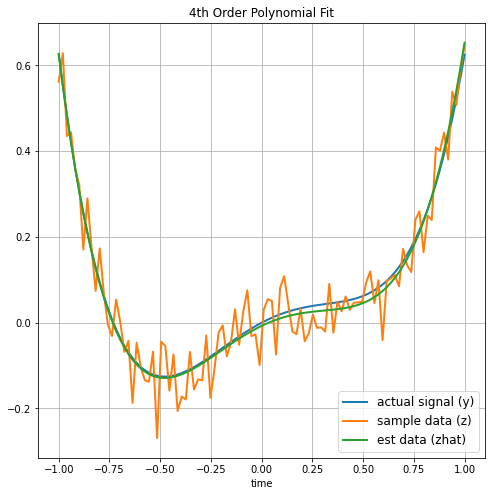

In [ ]:
#Define the 4th order polynomial basis
B = lambda t: [np.ones_like(t), t, t**2, t**3, t**4]
t0,tN = -1, 1
N = 100
tspan = np.linspace(t0,tN,num=N)
# define some coefficients 
c = [0.,0.25,-.375,-.25,1.]
np.random.seed(30)
y = evalBc(tspan, B, c)
eta = .05 * np.random.randn(N) 
z = y + eta

cHat,H = leastSqrsEstimate(tspan, z, B) #Compute lst. sqrs. est.

zHat = np.dot(H, cHat) #Generate zHat for Plotting

print(f'Polynomial fit coefficients = {cHat.T}')
plt.figure(figsize=(8,8));
plt.plot(tspan[:], y.T[:], linewidth=2, label=r'actual signal (y)')
plt.plot(tspan[:], z.T[:], linewidth=2, label=r'sample data (z)')
plt.plot(tspan[:], zHat[:], linewidth=2, label=r'est data (zhat)')
plt.xlabel('time')
plt.title('4th Order Polynomial Fit')
plt.legend(fontsize=12)
plt.grid()

2) Using the second harmonic Fourier basis function $B = \{1,\sin(t),\cos(t),\sin(2t),\cos(2t)\}$

Fourier basis fit coefficients = [[-0.27862144 -0.01588038 -0.94406772  0.96027488  0.54640762]]


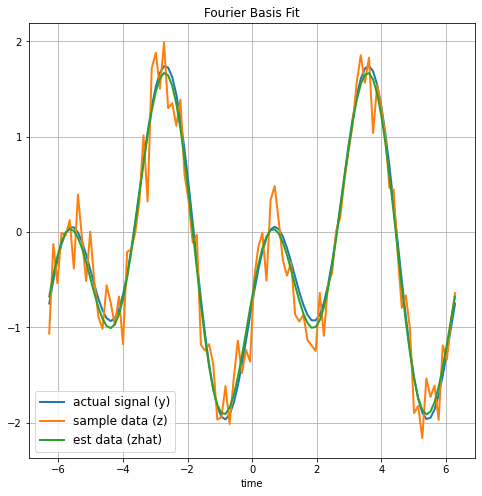

In [ ]:
#Define a 2nd harmonic Fourier basis function
B = lambda t: [np.ones_like(t), np.sin(t), np.cos(t), np.sin(2*t), np.cos(2*t)]
t0,tN = -1, 1
N = 100
tspan = 2 * np.pi * np.linspace(t0,tN,num=N)
# define some coefficients 
c = [-.25, 0.,-1.,1.,0.5]
np.random.seed(30)
y = evalBc(tspan, B, c)
eta = .25 * np.random.randn(N) 
z = y + eta

cHat,H = leastSqrsEstimate(tspan, z, B) #Compute lst. sqrs. est.

zHat = np.dot(H, cHat) #Generate zHat for Plotting

print(f'Fourier basis fit coefficients = {cHat.T}')
plt.figure(figsize=(8,8));
plt.plot(tspan[:], y.T[:], linewidth=2, label=r'actual signal (y)')
plt.plot(tspan[:], z.T[:], linewidth=2, label=r'sample data (z)')
plt.plot(tspan[:], zHat[:], linewidth=2, label=r'est data (zhat)')
plt.xlabel('time')
plt.title('Fourier Basis Fit')
plt.legend(fontsize=12)
plt.grid()

3) Using a mixture of Gaussian radial basis function $B = e^{\frac{-\Vert x - \mu_i\Vert^2}{2 \sigma^2}}$

Radial basis coefficients = [[-0.03989184  1.15425787  0.93162711  1.12862694 -0.03533781]]


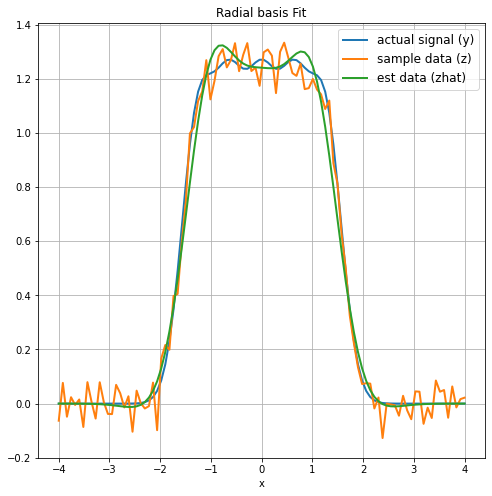

In [ ]:
def radial_basis(x, mu):
    sigma = 0.5
    basis = []
    for _, u in enumerate(mu):
      basis.append(np.exp(-(x - u) ** 2. / (2 * sigma ** 2.)))

    return basis

x0,xN = -4, 4
N = 100
xspan = np.linspace(x0,xN,num=N)
mu = [-2, -1, 0, 1, 2]
B = lambda x: radial_basis(x, mu)

c = [1., 1., 1., 1., 1.]
np.random.seed(30)
y = evalBc(xspan, B, c)
eta = .05 * np.random.randn(N) 
z = y + eta

cHat,H = leastSqrsEstimate(xspan, z, B) #Compute lst. sqrs. est.
zHat = np.dot(H, cHat) #Generate zHat for Plotting

print(f'Radial basis coefficients = {cHat.T}')
plt.figure(figsize=(8,8));
plt.plot(xspan[:], y.T[:], linewidth=2, label=r'actual signal (y)')
plt.plot(xspan[:], z.T[:], linewidth=2, label=r'sample data (z)')
plt.plot(xspan[:], zHat[:], linewidth=2, label=r'est data (zhat)')
plt.xlabel('x')
plt.title('Radial basis Fit')
plt.legend(fontsize=12)
plt.grid()

# hybrid random variables

***Purpose:*** *this problem shows that random variables need not be purely "continuous" or "discrete".*

Consider the random variable $x:\Omega\rightarrow\mathbb{R}$ obtained from a standard normal random variable $y:\Omega\rightarrow\mathbb{R}$ as follows:
$$\forall\omega\in\Omega : x(\omega) = y(\omega)\ \text{if}\ y(\omega) > 0,\ \text{otherwise}\ 0.$$

(a) *Does $x$ have a probability density function?  (i.e. does there exist a function $\rho:\mathbb{R}\rightarrow[0,\infty)$ such that the probability that $x$ takes on values in the set $W\subset\mathbb{R}$ is $\int_W \rho(\omega) d\omega$?)*

***There are two possible solutions to this problem, depending on whether you allow the use of [generalized functions / distributions like the Dirac delta](https://en.wikipedia.org/wiki/Dirac_delta_function).***

**Solution with Dirac delta:**

Let $\bar{\rho}$ denote the probability density for the standard normal distribution, define $\rho^+(\omega) = \bar{\rho}(\omega)$ for $\omega > 0$ and $\rho^+(\omega) = 0$ for $\omega \le 0$, and let $\delta$ denote the Dirac delta.  Then **we have that $\rho = \frac{1}{2}\delta + \rho^+$ is a probability density** (not a regular function -- instead, a *generalized function* or *distribution*) for outcomes of the random variable $x$ in the sense that $P(x\in W) = \int_W \rho(\omega) d\omega$ for all $W\subset\Omega$.

**Solution without Dirac delta:**

Recall, that if there exists some probability density function $\rho(x)$, we must be able to write:

$P(x\in W) = \int_W \rho(\omega)d\omega$ for all $W\subset\Omega$.

In order to agree with the probability distribution as specified, since $y(\omega)$ is standard normal, we know that

$P(x = 0) = \int_{-\infty}^0 \frac{1}{\sqrt{2\pi}}e^{-x^2/2}dx = \frac{1}{2}$

But without a Dirac delta, we cannot have $\int_0^0 \rho(\omega)d\omega > 0$ for any function $\rho$ -- achieving this would require "infinite density" at $0$. Therefore, we **cannot define a probability density function** for this hybrid random variable.

(b) *Provide an analytical expression and numerical value for $E[x]$ (the analytical expression can involve an improper integral).*

**Solution:**

We can solve this problem in 2 ways:



1) Despite the fact that no PDF for $x$ exists, we can define a kind of pseudo-PDF $\psi(x)$ using the Dirac delta function, strictly for the purposes of making computation of the expectation value easier:

$\psi(x) = \begin{cases} 
\frac{1}{\sqrt{2\pi}}e^{-x^2/2} & x > 0 \\
\frac{\delta(x)}{2} & x \leq 0 \end{cases}$

So:

$E[x] = \int_{-\infty}^\infty x\psi(x)dx = \int_{-\infty}^0 \frac{x\delta(x)}{2}dx + \int_0^\infty x\frac{1}{\sqrt{2\pi}}e^{-x^2/2}dx = 0 + \left[-\frac{1}{\sqrt{2\pi}}e^{-x^2/2}\right]_0^\infty = \frac{1}{\sqrt{2\pi}}$

2) A more straigtforward way is to note that since $y(\omega)$ is a standard normal random variable, $P(y < 0) = 1/2$. Thus, $P(x=0) = 1/2$. We know that the probability density for $x>0$ is just given by the standard normal density. Combining these two components, the part ($x>0$) that has a density and the part ($x\leq 0$) that only has a point probability mass at $x=0$ with infinite density and probability $1/2$, we have:

$E[x] = (0)\frac{1}{2} + \int_0^\infty x\frac{1}{\sqrt{2\pi}}e^{-x^2/2}dx = \frac{1}{\sqrt{2\pi}}$